In [4]:
from os import path
import sys
sys.path.append(path.abspath(path.join(path.dirname(path.abspath('')), '.')))

from scripts.data_cleaning import load_csv, univariate_analysis, bivariate_analysis,correlation_matrix
from scripts.data_cleaning import clean_dataframe, analyze_and_remove_duplicates, analyze_categorical_features


In [5]:
print ("Loading data...",)
credit_data = load_csv('../Data/creditcard.csv')
fraud_data = load_csv('../Data/Fraud_Data.csv')
ip_address = load_csv('../Data/IpAddress_to_Country.csv')

Loading data...


2025-02-18 15:44:18,012 - INFO - ✅  CSV file '../Data/creditcard.csv' loaded successfully.
2025-02-18 15:44:18,480 - INFO - ✅  CSV file '../Data/Fraud_Data.csv' loaded successfully.
2025-02-18 15:44:18,553 - INFO - ✅  CSV file '../Data/IpAddress_to_Country.csv' loaded successfully.


In [6]:
credit_data.head()
fraud_data.head()
ip_address.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
print ("Cleaning data...",)
credit_data = clean_dataframe(credit_data)
fraud_data = clean_dataframe(fraud_data)
ip_address = clean_dataframe(ip_address)

2025-02-18 15:44:18,583 - INFO - Starting data cleaning...
2025-02-18 15:44:18,585 - INFO - Initial shape: (284807, 31)
2025-02-18 15:44:18,586 - INFO - Initial columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
2025-02-18 15:44:18,586 - INFO - Processing missing values...
2025-02-18 15:44:18,607 - INFO - Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
2025-02-18 15:44:18,670 - INFO - Removing duplicates...


Cleaning data...


2025-02-18 15:44:19,559 - INFO - Removed 1081 duplicate rows.
2025-02-18 15:44:19,560 - INFO - Correcting data types...
2025-02-18 15:44:19,560 - INFO - Final shape after cleaning: (283726, 31)
2025-02-18 15:44:19,561 - INFO - Data cleaning completed successfully.

2025-02-18 15:44:19,562 - INFO - Starting data cleaning...
2025-02-18 15:44:19,563 - INFO - Initial shape: (151112, 11)
2025-02-18 15:44:19,563 - INFO - Initial columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']
2025-02-18 15:44:19,565 - INFO - Processing missing values...
2025-02-18 15:44:19,623 - INFO - Missing values per column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
2025-02-18 15:44:19,714 - INFO - Removing duplicates...
2025-02-18 15:44:19,

In [8]:
fraud_data['signup_hour'] = fraud_data['signup_time'].dt.hour
fraud_data['signup_date'] = fraud_data['signup_time'].dt.date
fraud_data['signup_weekday'] = fraud_data['signup_time'].dt.weekday
fraud_data.drop('signup_time', axis=1, inplace=True)


fraud_data['purchase_hour'] = fraud_data['purchase_time'].dt.hour
fraud_data['purchase_date'] = fraud_data['purchase_time'].dt.date
fraud_data['purchase_weekday'] = fraud_data['purchase_time'].dt.weekday
fraud_data.drop('purchase_time', axis=1, inplace=True)

print(fraud_data[['signup_hour', 'signup_date', 'signup_weekday', 'purchase_hour', 'purchase_date', 'purchase_weekday']].head())

   signup_hour signup_date  signup_weekday  purchase_hour purchase_date  \
0           22  2015-02-24               1              2    2015-04-18   
1           20  2015-06-07               6              1    2015-06-08   
2           18  2015-01-01               3             18    2015-01-01   
3           21  2015-04-28               1             13    2015-05-04   
4            7  2015-07-21               1             18    2015-09-09   

   purchase_weekday  
0                 5  
1                 0  
2                 3  
3                 0  
4                 2  


2025-02-18 15:44:20,357 - INFO - Generating univariate analysis for column 'purchase_value'...


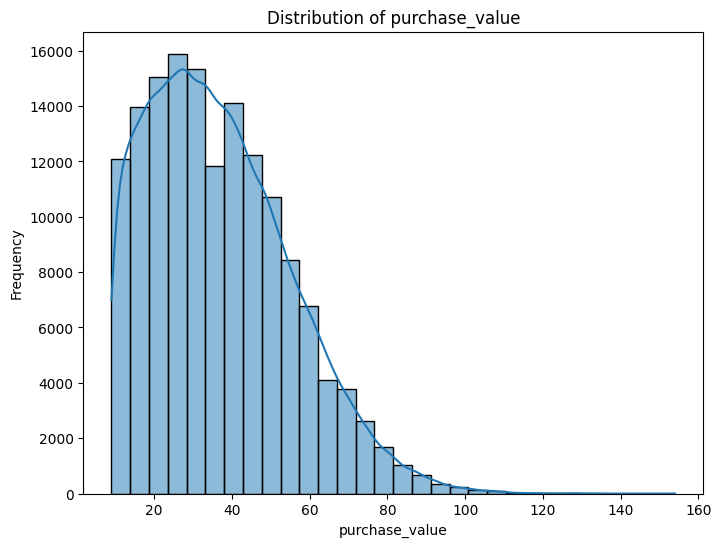

In [9]:
univariate_analysis(fraud_data, 'purchase_value', bins=30)

2025-02-18 15:44:21,447 - INFO - Generating bivariate analysis for 'age' vs 'purchase_value'...


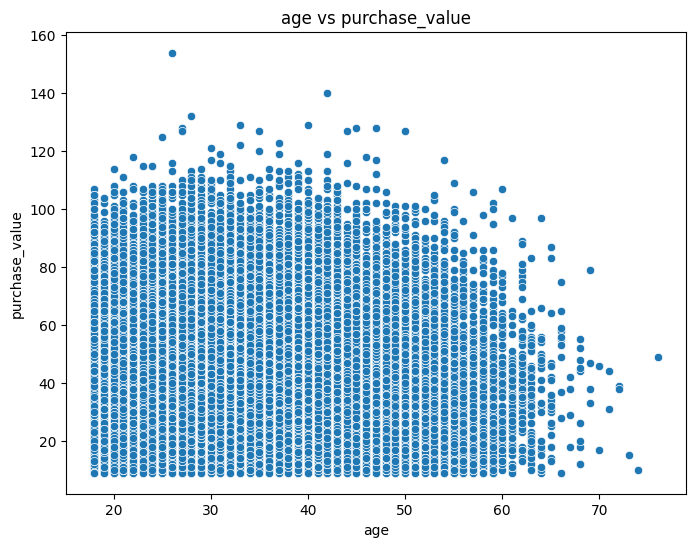

In [10]:
bivariate_analysis(fraud_data, 'age', 'purchase_value')

In [11]:
fraud_data = analyze_and_remove_duplicates(fraud_data)

2025-02-18 15:44:22,304 - INFO - No duplicate rows found.


2025-02-18 15:44:22,316 - INFO - Generating correlation matrix...


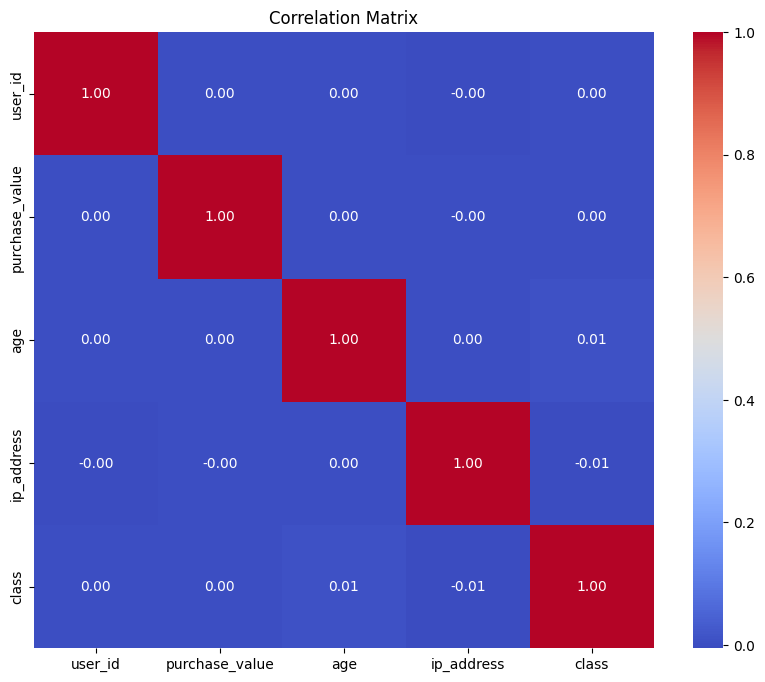

In [12]:
# Correlation matrix
correlation_matrix(fraud_data)


2025-02-18 15:44:22,620 - INFO - Analyzing categorical feature 'source'...


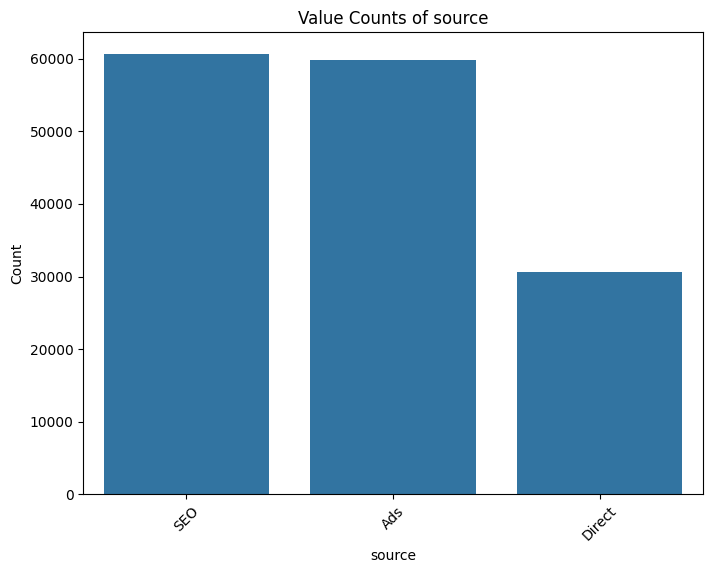

2025-02-18 15:44:23,087 - INFO - Analyzing categorical feature 'browser'...


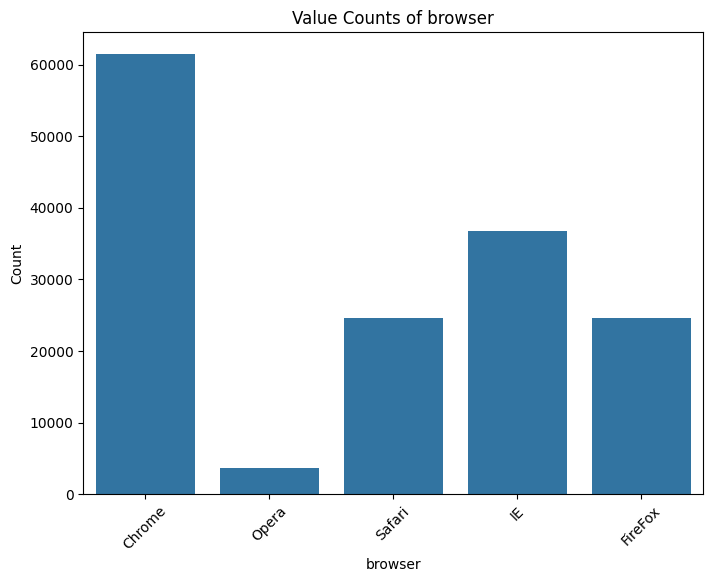

In [13]:

# Categorical feature analysis
analyze_categorical_features(fraud_data, 'source')
analyze_categorical_features(fraud_data, 'browser')


In [ ]:

ip_address['lower_bound_ip_int'] = ip_address['lower_bound_ip_address'].apply(int)
ip_address['upper_bound_ip_int'] = ip_address['upper_bound_ip_address'].apply(int)

In [15]:
# Convert IP addresses in fraud_data to integers
fraud_data['ip_int'] = fraud_data['ip_address'].apply(int)

# Function to find the country for a given IP integer
# lower_bound_ip_int	upper_bound_ip_int
def get_country(ip_int, ip_country_df):
    """Find the country for a given IP integer."""
    condition = (ip_country_df['lower_bound_ip_int'] <= ip_int) & (ip_country_df['upper_bound_ip_int'] >= ip_int)
    matching_rows = ip_country_df[condition]
    if not matching_rows.empty:
        return matching_rows.iloc[0]['country']
    return 'Unknown'

# Add a 'country' column to fraud_data
fraud_data['country'] = fraud_data['ip_int'].apply(lambda x: get_country(x, ip_address))

In [16]:
fraud_data.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,signup_hour,signup_date,signup_weekday,purchase_hour,purchase_date,purchase_weekday,ip_int,country
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,22,2015-02-24,1,2,2015-04-18,5,732758368,Japan
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,20,2015-06-07,6,1,2015-06-08,0,350311387,United States
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,18,2015-01-01,3,18,2015-01-01,3,2621473820,United States
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,21,2015-04-28,1,13,2015-05-04,0,3840542443,Unknown
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,7,2015-07-21,1,18,2015-09-09,2,415583117,United States


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
fraud_data.to_csv("../Data/fraud_data_cleaned_before_encode.csv", index=False)
# Encode non-numeric columns
for column in fraud_data.select_dtypes(include=['object']).columns:
    fraud_data[column] = label_encoder.fit_transform(fraud_data[column])

fraud_data.head()
save_path = '../Data/fraud_data_cleaned.csv'
fraud_data.to_csv(save_path, index=False)
print(f"Data saved to {save_path}")



Data saved to ../Data/fraud_data_cleaned.csv


In [30]:
import json

# Calculate summary statistics
total_transactions = len(fraud_data)
fraud_cases = fraud_data['class'].sum()
fraud_percentage = (fraud_cases / total_transactions) * 100

summary_stats = {
    "total_transactions": total_transactions,
    "fraud_cases": int(fraud_cases),
    "fraud_percentage": float(fraud_percentage)
}

# Convert to JSON
summary_stats_json = json.dumps(summary_stats)
print(summary_stats_json)

{"total_transactions": 151112, "fraud_cases": 14151, "fraud_percentage": 9.364577267192546}
